<a href="https://colab.research.google.com/github/Rogerio-mack/grupo7_algoritmos_quanticos/blob/main/Atividade_UA1_UA2_QA_Grover_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREFA UA1-UA2**
### **CIMATEC - CPGINV-HPC-0013 | Algoritmos de Computação Quântica**



# **Alunos**

```
Bruno Zolotareff dos Santos
Lihoy Aguiar Bellissimo
Marcos Aurélio Duarte Carvalho
Rafael Marin Machado de Souza
Rogério de Oliveira
Thiago Soares Assimos
Roberto Machado Velho
```


# Conteúdo

1. [Introdução]()

2. [Algoritmo de Grover]()

>  2.1. [Visão geral do algoritmo]()

>  2.2. [Preparação do estado inicial]()

>  2.3. [O oráculo]()

>  2.4. [Operador de Difusão]()

>  2.5. [Número ideal de iterações]()

>  2.6. [Análise de complexidade]()

3. [Implementações]()

> 3.1. [Primeiro Cenário]()
>> *Implementação básica do algoritmo de **2 qubits e um alvo***

> 3.2. [Segundo Cenário]()
>> *Implementação de **16 qubits e um alvo**, e comparação com a busca clássica*

> 3.3. [Terceiro Cenário]()
>> *Implementação com o **máximo número de qubits (alcançamos 20) e um alvo***

> 3.4. [Quarto Cenário]()
>> *Implementação de **5 qubits e 3 alvos***

> 3.5. [Quarto Cenário, em um computador quântico real]()
>> *As implementações anteriores empregam o Qiskit e o simulador **AerSimulator**. O quarto cenário (**5 qubits e 3 alvos**) é aqui também implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.*

4. [Discussão dos resultados e Conclusão]()

# 1. Introdução <a id='introdução'></a>

Este trabalho implementa e analisa **quatro cenários do algoritmo quântico de Grover** com o Qiskit, propostos para a atividade da TAREFA UA1-UA2 (disciplina CPGINV-HPC-0013 | Algoritmos de Computação Quântica):

1. Implementação básica do algoritmo de **2 qubits e um alvo**
2. Implementação de **16 qubits e um alvo**, e comparação com a busca clássica
3. Implementação com o **máximo número de qubits (alcançamos 20) e um alvo**
4. Implementação de **5 qubits e 3 alvos**

As implementação empregam o Qiskit e o simulador **AerSimulator**. O último cenário é ainda implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.



# 2. Algoritmo de Grover

O algoritmo de Grover (1996) [1] é um algoritmo quântico destinado a resolver o problema de *busca em um espaço não estruturado*: dado um conjunto com $N$ elementos e um *oráculo*, uma função geral do tipo:

$$
f(x) =
\begin{cases}
1, & \text{se } x \text{ é uma solução}, \\
0, & \text{caso contrário}.
\end{cases}
$$

capaz de verificar se um elemento é solução ou não, o objetivo é encontrar um elemento marcado.

No modo clássico, esse problema requer no pior caso $O(N)$ consultas ao oráculo. O algoritmo de Grover fornece uma aceleração quadrática ao modo clássico, o que permite encontrar a solução
em apenas $O(\sqrt{N})$ consultas.

A ideia geral do algoritmo é explorar a superposição e interferência quânticas, e as rotações no espaço de estados, para amplificar progressivamente a amplitude associada ao estado
solução.



## 2.1 Visão geral do algoritmo

O algoritmo de Grover consiste em três etapas principais: preparação do estado, oráculo e operador de difusão. Na preparação do estado, criamos o espaço de busca, que engloba todos os casos possíveis para a resposta. O oráculo marca a resposta correta, ou as respostas que procuramos, e o operador de difusão amplifica essas respostas para que se destaquem e sejam avaliadas ao final do algoritmo.

![image2](https://github.com/Rogerio-mack/grupo7_algoritmos_quanticos/blob/main/images/grover_steps.png?raw=true)  

## 2.2 Preparação do estado inicial

O algoritmo emprega um circuito  quântico com $n$ qubits, capaz de representar
$N = 2^n$ estados computacionais. O sistema é preparado com todos os qubits no estado inicial $|0\rangle$:

$$
|0\rangle^{\otimes n}
$$

Na sequência aplica-se então a porta de Hadamard a cada qubit, produzindo uma superposição
de todos os estados possíveis:

$$
|\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle.
$$

Nesse estado inicial, todas as configurações possuem a mesma amplitude, não havendo
qualquer distinção entre os estados solução e não-solução.



## 2.3 O oráculo

O oráculo é uma operação unitária que codifica a solução do problema. Ele implementa
a função:

$$
f(x) =
\begin{cases}
1, & \text{se } x \text{ é uma solução}, \\
0, & \text{caso contrário}.
\end{cases}
$$

No algoritmo de Grover, o oráculo atua como uma inversão de fase:

$$
U_f |x\rangle = (-1)^{f(x)} |x\rangle.
$$

Com isso, o estado correspondente à solução ($f(x) = 1$) tem sua fase invertida, enquanto os demais
estados ($f(x) = 0$) permanecerão inalterados. Nenhuma medição é realizada nessa etapa. A informação
sobre a solução é codificada exclusivamente na fase do estado quântico.



## 2.4 Operador de difusão

Após a aplicação do oráculo, aplica-se o operador de difusão (também chamado de operador de *inversão em torno da média*):

$$
D = 2|\psi_0\rangle\langle\psi_0| - I.
$$

Esse operador reflete as amplitudes dos estados em torno da amplitude média,
convertendo a inversão de fase do estado marcado em um aumento efetivo de sua
amplitude.

Uma iteração completa do algoritmo de Grover consiste na aplicação sequencial do
oráculo e do operador de difusão.

> *Geometricamente, essas operações correspondem a uma rotação em um subespaço bidimensional gerado pelos estados:*

> - *$ |w\rangle $: superposição normalizada dos estados solução;*
> - *$ |r\rangle $: superposição normalizada dos estados não-solução.*




## 2.5 Número ideal de iterações

Há um número ideal de iterações no qual a probabilidade de medir o estado solução é maximizada.

Seja $M$ o número de soluções do problema. Define-se um ângulo $\theta$ tal que
$$
\sin^2(\theta) = \frac{M}{N}.
$$

Cada iteração de Grover realiza uma rotação de ângulo $2\theta$ no subespaço
$\{|w\rangle, |r\rangle\}$.

No caso mais comum, em que há apenas uma solução ($M = 1$), tem-se
$$
\theta \approx \frac{1}{\sqrt{N}}.
$$

O número ideal de iterações é aproximadamente
$$
k \approx \frac{\pi}{4}\sqrt{N}.
$$

Exatamente após esse número de iterações, a probabilidade de medir o estado solução é maximizada. Iterações em excesso, seguintes,  fazem essa probabilidade oscilar e diminuir novamente.



## 2.6 Análise de complexidade

A complexidade do algoritmo de Grover é analisada em termos do número de consultas ao oráculo:

- Busca clássica não estruturada: $O(N)$;
- Algoritmo de Grover: $O(\sqrt{N})$.

Em aplicações criptográficas, como a quebra de chaves em criptografia simétrica, se a chave secreta possui $n$ bits, então o espaço de
busca tem tamanho $N = 2^n$ e o algoritmo de Grover reduz a complexidade de força bruta de $O(2^n)$ para $O(2^{n/2})$.



| Contexto                         | Tamanho do espaço de busca | Complexidade clássica | Complexidade com Grover |
| -------------------------------- | -------------------------- | --------------------- | ----------------------- |
| Busca abstrata                   | $N$                        | $O(N)$                | $O(\sqrt{N})$           |
| Criptografia (chave de (n) bits) | $2^n$                      | $O(2^n)$              | $O(2^{n/2})$            |


Essa aceleração implica que, para manter o mesmo nível de segurança contra ataques quânticos baseados em Grover, o tamanho das chaves simétricas precisa ser minimamente dobrado.




# 3. Implementações

As implementação dos cenários propostos empregam o Qiskit e o simulador **AerSimulator**. O último cenário é ainda implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.

### Instalação e importação das bibliotecas

In [ ]:
try:
  import qiskit; print(qiskit.__version__)
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]
  import qiskit; print(qiskit.__version__)

Install Qiskit
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
2.2.3


In [ ]:
try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');


Install Qiskit-Aer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.8 MB/s eta 0:00:00
Qiskit Aer imported


In [ ]:
import numpy as np
from numpy import pi, sqrt, sin, cos
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

# QISKIT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, circuit_drawer
from qiskit_aer import QasmSimulator, AerSimulator


# 3.1 Primeiro Cenário <a id='cenario1'></a>

**Enunciado:** O primeiro cenário de testes que você deve montar para a análise é com 2 qubits e 1 alvo. Esse caso serve para validar o funcionamento do circuito em baixa escala. Execute o algoritmo e verifique se o estado alvo aparece com alta probabilidade nas medições.

**Solução:** Contruímos um circuito de 2 qubits com aplicação do oráculo e do operador de difusão,  $U_w U_s$, uma única vez. O  valor alvo aqui é $|10\rangle$. Emprega-se o  simulador AerSimulator (Qiskit).

## 3.1.1 Oráculo de Marcação

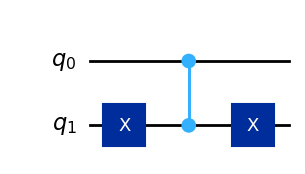

In [ ]:
num_qubits = 2
g_oracle = QuantumCircuit(num_qubits)

# To mark the state |10> with a phase flip:
# 1. Apply X gate to qubit 1 to convert |10> to |11>
g_oracle.x(1)
# 2. Apply a Controlled-Z (CZ) gate between qubit 0 and qubit 1
#    This flips the phase of the |11> state.
g_oracle.cz(0, 1)
# 3. Apply X gate to qubit 1 again to convert |11> back to |10>
g_oracle.x(1)

Uw = g_oracle.to_gate(label='Uw')

display(g_oracle.draw('mpl'))

## 3.1.2 Operador de Difusão

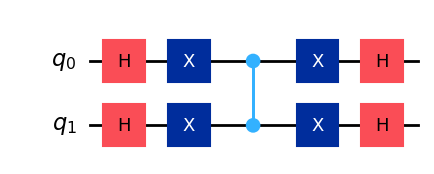

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

g_difusor.h(range(num_qubits))
g_difusor.x(range(num_qubits))
g_difusor.cz(0,1)
g_difusor.x(range(num_qubits))
g_difusor.h(range(num_qubits))

Us = g_difusor.to_gate(label='Us')

display(g_difusor.draw('mpl'))

## 3.1.3 Aplicando $U_wU_s$, uma única vez

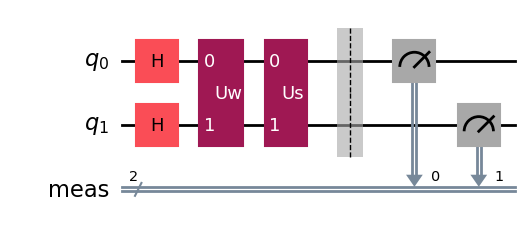

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))
g_qc.append(Uw, range(num_qubits))
g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
result.get_counts()



{'01': 1024}

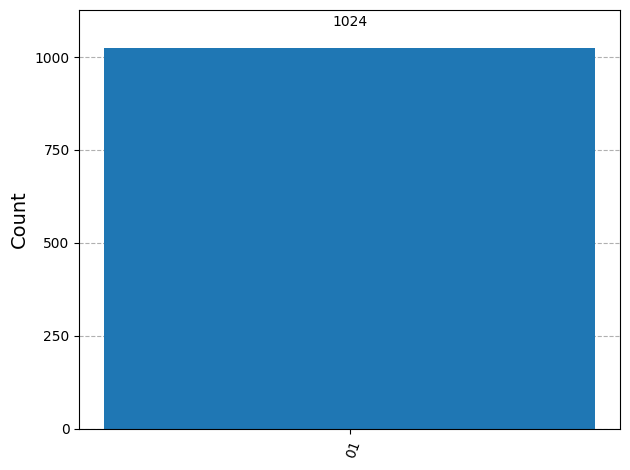

In [ ]:
plot_histogram(result.get_counts())

## 3.1.4 Resultado

Em 1024 simulações o resultado encontrado é o mesmo e corresponde ao valor alvo $|10\rangle$.  

# 3.2 Segundo Cenário <a id='cenario2'></a>

**Enunciado**: O segundo cenário utiliza 16 qubits e 1 alvo, definido como o maior valor possível (1111 1111 1111 1111). Nesse caso, além de rodar a versão quântica, implemente uma busca clássica linear, percorrendo todos os estados de até , e compare o tempo de execução.

**Solução:** Contruímos um circuito de 16 qubits com aplicação do oráculo e do operador de difusão,  $U_w U_s$, $200$ vezes,  número no qual a probabilidade de medir o estado solução é maximizada.  O  valor alvo aqui é $|1111 \space 1111 \space  1111 \space 1111\rangle$. Emprega-se o  simulador AerSimulator (Qiskit).

Mostra-se que iterações abaixo e acima desse valor (200) leva a valores menores de probabilidade do estado solução.

Comparam-se, ainda, as iterações da solução quântica e clássica.

## 3.2.1 Oráculo de Marcação

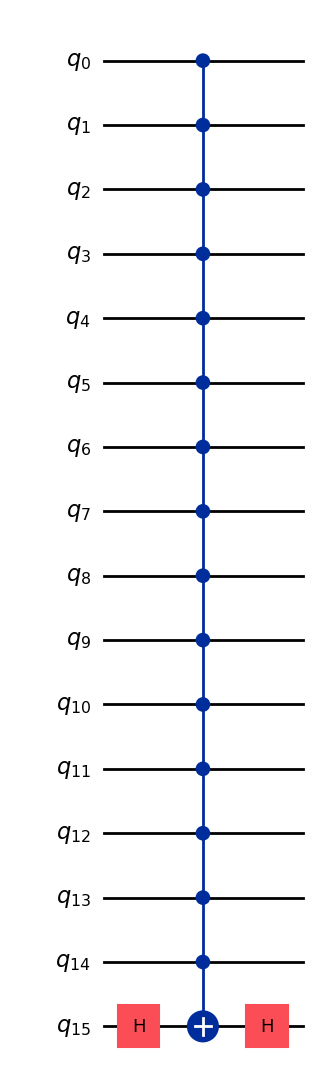

In [ ]:
num_qubits = 16
g_oracle = QuantumCircuit(num_qubits)

# Apply X gates to flip qubits 12 and 14 to '1' for the target state |1010 1111 1111 1111>
# (assuming qubit 0 is LSB, so 12th and 14th qubits are '0' in the target state)
# g_oracle.x(12)
# g_oracle.x(14)

# Define controls and target for the multi-controlled Z gate
# All qubits except the last one (qubit 15) are controls
controls = list(range(num_qubits - 1))
target = num_qubits - 1

# Apply the multi-controlled Z gate (MCZ) using MCX and Hadamard gates
g_oracle.h(target)
g_oracle.mcx(controls, target)
g_oracle.h(target)

# Revert the X gates to un-flip qubits 12 and 14
# g_oracle.x(12)
# g_oracle.x(14)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

## 3.2.2 Operador de Difusão

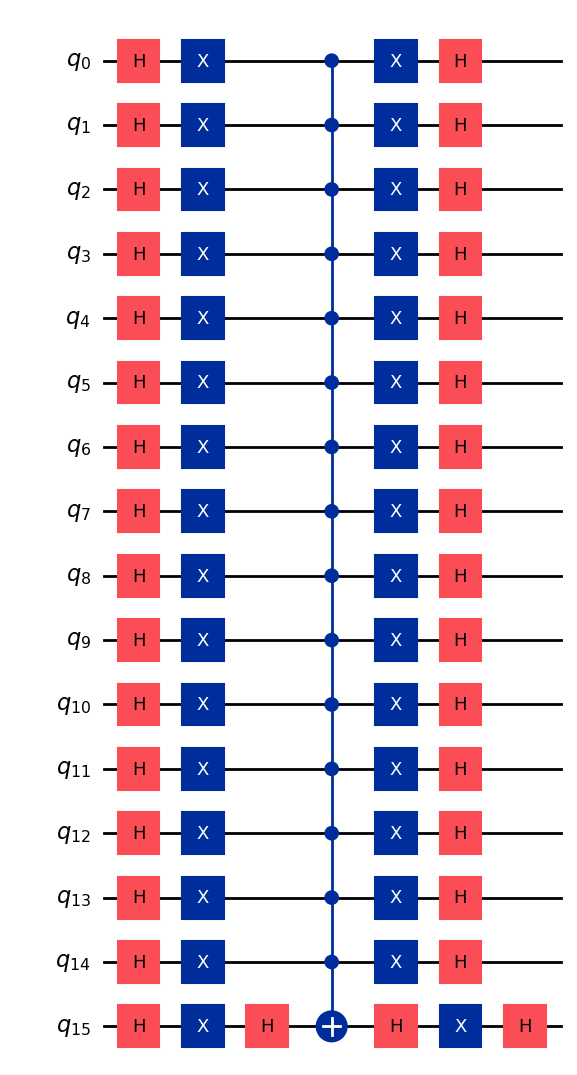

In [ ]:
num_qubits = 16
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

## 3.2.3 Aplicando $U_wU_s$, $200 \times$

Para um espaço de tamanho \(N\) contendo uma única solução, o número ideal de iterações do algoritmo de Grover (aplicação oráculo quântico e do operador de difusão) é aproximadamente:

$$
r \approx \frac{\pi}{4}\sqrt{N}
$$

Substituindo $N = 2^{16}$:

$$
\sqrt{N} = \sqrt{2^{16}} = 2^8 = 256
$$

$$
r \approx \frac{\pi}{4} \cdot 256 \approx 201
$$

Portanto, o algoritmo de Grover necessita de aproximadamente $r=200$ iterações.





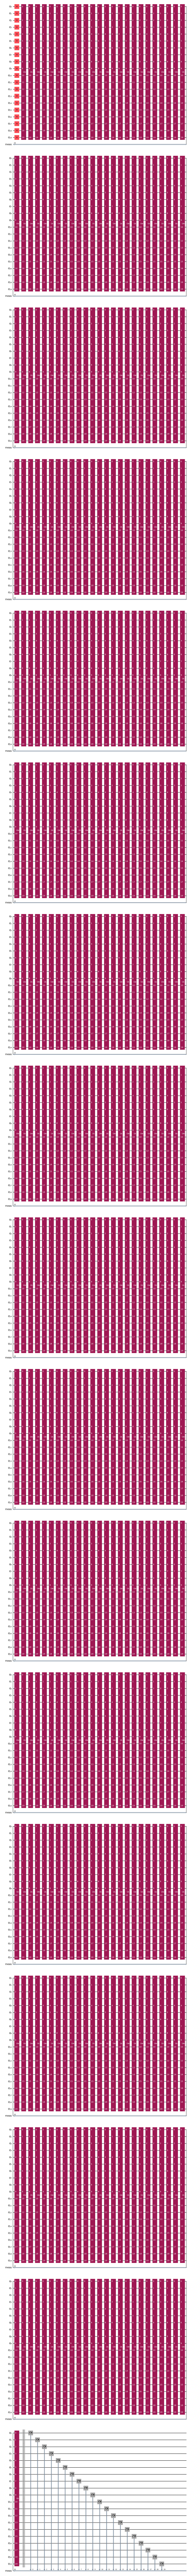

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(200):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
# result.get_counts()


In [ ]:
counts = result.get_counts()
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
top_5_results = sorted_counts[:5]

print("Top 5 results with highest values:")
for key, value in top_5_results:
    print(f"Key: {key}, Value: {value}")

Top 5 results with highest values:
Key: 11111111111111111111, Value: 129
Key: 10010000000100101010, Value: 1
Key: 01000110001001000001, Value: 1
Key: 00011101010011101101, Value: 1
Key: 10001101011110110001, Value: 1


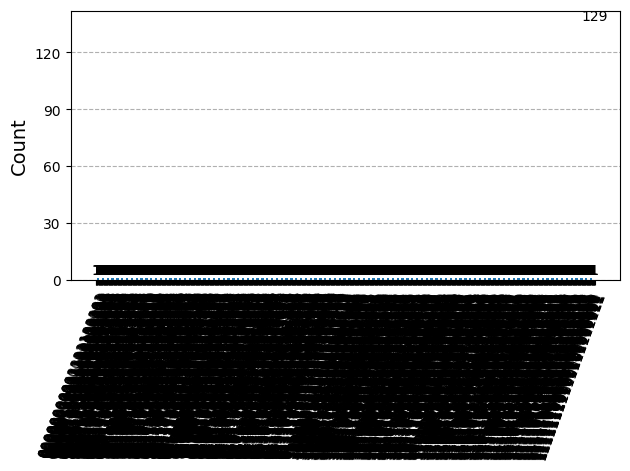

In [ ]:
plot_histogram(result.get_counts())

### Valores menores de iteração

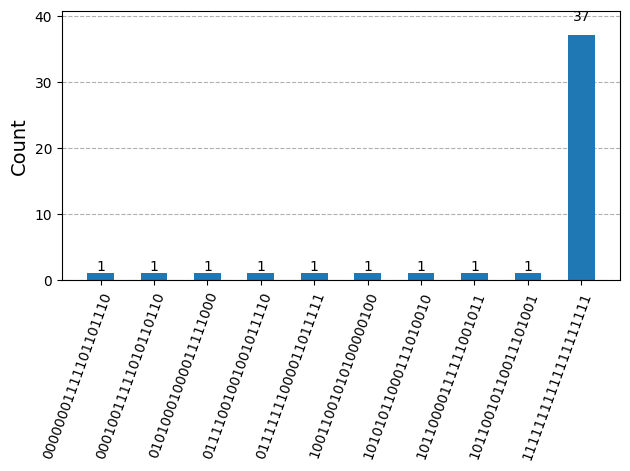

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(100):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

# display(g_qc.draw('mpl'))

simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()

counts = result.get_counts()
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
top_10_results = sorted_counts[:10]
top_10_results = dict(top_10_results)

plot_histogram(top_10_results)

### Valores maiores de iteração

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(500):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

# display(g_qc.draw('mpl'))

simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()

counts = result.get_counts()
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
top_10_results = sorted_counts[:10]
top_10_results = dict(top_10_results)

plot_histogram(top_10_results)

KeyboardInterrupt: 

## 3.2.4 Busca Clássica

Na busca clássica por força bruta, cada elemento do espaço precisa ser testado individualmente.

- Pior caso:
$$
N = 65\,536 \text{ verificações}
$$
- Caso médio:
$$
\frac{N}{2} = 32\,768 \text{ verificações}
$$


Em termos assintóticos, a complexidade da busca clássica é portanto $O(N) = O(2^{16})$.

In [ ]:
import itertools
import random

# Generate all possible 16-bit binary strings
all_16bit_values = []
for bits in itertools.product('01', repeat=16):
    all_16bit_values.append("".join(bits))

# Randomly shuffle the list
random.shuffle(all_16bit_values)

# Print the first few to demonstrate (the full list is very long)
print(f"Generated {len(all_16bit_values)} unique 16-bit binary values.")
print("First 10 random values:")
for i in range(10):
    print(all_16bit_values[i])

# The complete shuffled list is in 'all_16bit_values'


Generated 65536 unique 16-bit binary values.
First 10 random values:
0111101110100000
0011111110011010
1100011101100000
1001001011001001
1110010100010011
0110101101011001
1100010000011110
0111000001101001
1011010111001001
1010100001101010


In [ ]:
import time

target_element = '1111111111111111'
iterations = 0
found = False

start_time = time.time()

for i, element in enumerate(all_16bit_values):
    iterations += 1
    if element == target_element:
        found = True
        break

end_time = time.time()

execution_time = end_time - start_time

if found:
    print(f"Element '{target_element}' found.")
    print(f"Execution time: {execution_time:.6f} seconds.")
    print(f"Number of iterations: {iterations}")
else:
    print(f"Element '{target_element}' not found in the list.")
    print(f"Execution time: {execution_time:.6f} seconds.")
    print(f"Number of iterations: {iterations} (full list scanned)")

Element '1111111111111111' found.
Execution time: 0.011764 seconds.
Number of iterations: 23957


## 3.2.5 Resultado

O algoritmo encontrou a solução $|1111 \space 1111 \space 1111 \space 1111\rangle$ corretamente após 200 iterações da aplicação do oráculo e do operador de difusão, com o mesmo valor para 1024 simulações (probabilidade de 1024/1024).

Mostramos também que para um número de  iterações de 100, abaixo do número ideal de 200, ou valor maior de iterações (500) as probabilidade da solução alvo é menor foi menor que para o número de iterações ideal (respectivamente 497/1024 e 494/1024)

O ganho do algoritmo de Grover é quadrático, pois reduz o número de consultas ao oráculo de ordem $O(N)$ para ordem $O(\sqrt{N})$. Para 16 bits encontram-se os valores teóricos:

$$
\frac{65\,536}{256} = 256
$$

Na simulação apresentada, por exemplo, o valor obtido é de $\frac{23\,957}{200} \approx 112$, com um ganho claramente quadrático com relação à busca clássica.







# 3.3 Terceiro Cenário <a id='cenario3'></a>

**Enunciado:** O terceiro cenário consiste em usar o maior número de qubits viável no seu ambiente, com apenas um alvo. O objetivo aqui é observar os limites da simulação, verificando se ocorrem erros, lentidão ou travamentos.

**Solução**: Aqui, verificamos que o  simulador empregado AerSimulator (Qiskit) suporta até 29 qubits. Alcançamos aqui, com as limitações de recursos de tempo e memória em um ambient Google Colab, **20 bits**. O número de ***shots*** do simulador foi reduzido do padrão, 1024 empregados antes, para **512 execuções**.


**O simulador (AerSimulator) suporta até 29 qubits.**

```
CircuitTooWideForTarget: 'Number of qubits (32) in circuit-129 is greater than maximum (29) in the coupling_map'
```

In [ ]:
num_qubits = 20

## 3.3.1 Oráculo de Marcação

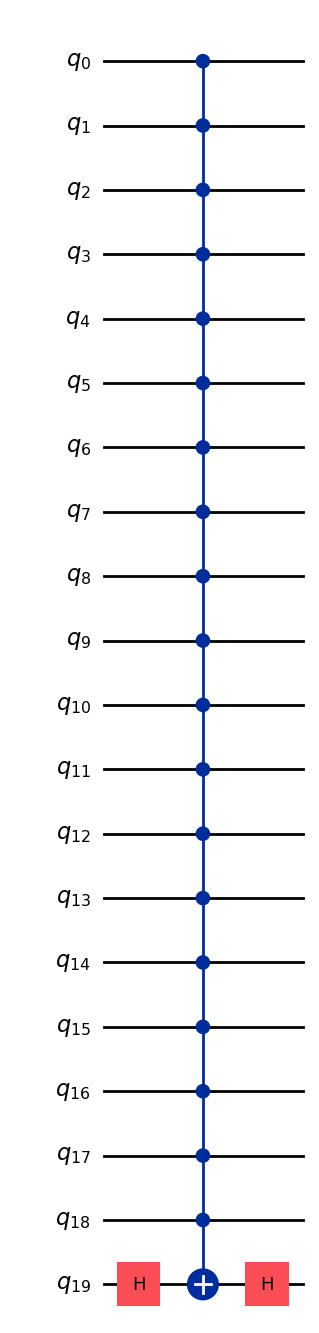

In [ ]:
g_oracle = QuantumCircuit(num_qubits)

# Define controls and target for the multi-controlled Z gate
# All qubits except the last one (qubit 15) are controls
controls = list(range(num_qubits - 1))
target = num_qubits - 1

# Apply the multi-controlled Z gate (MCZ) using MCX and Hadamard gates
g_oracle.h(target)
g_oracle.mcx(controls, target)
g_oracle.h(target)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

## 3.3.2 Operador de Difusão

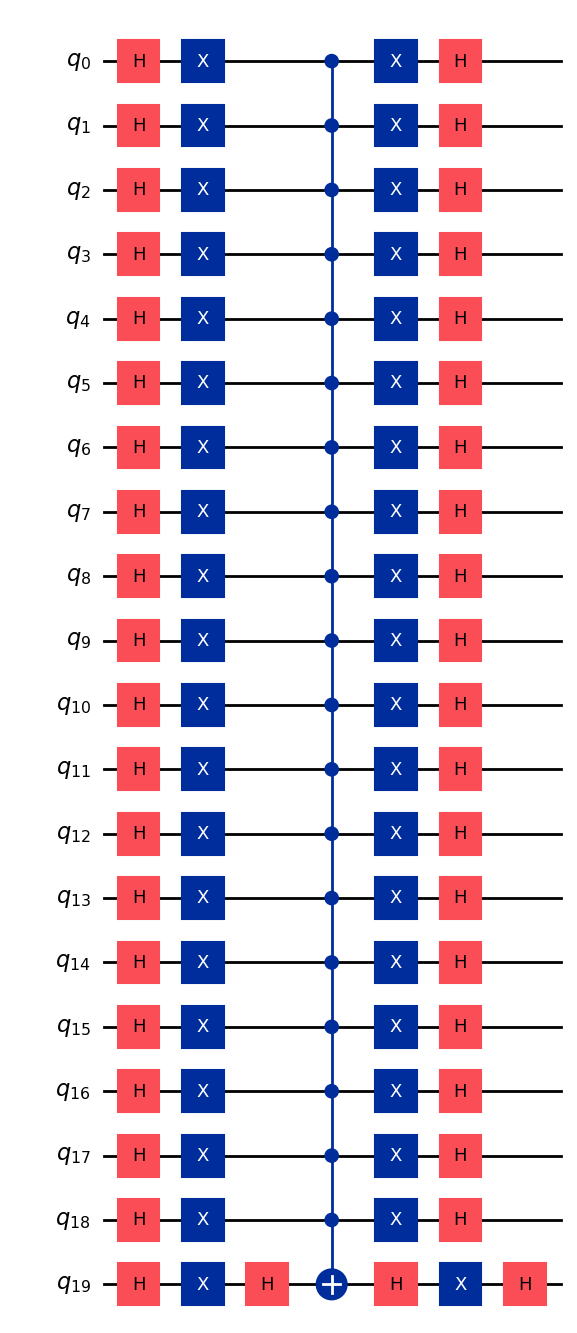

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

## 3.3.3 Aplicando $U_wU_s$, $r = 804 \times$



Agora, ajustamos a fórmula para o cálculo do número ideal de iterações para incluir o fator $k$, com o número de valores alvos desejados:

$$ r \approx \frac{\pi}{4} \sqrt{\frac{2^n}{k}}$$

In [ ]:
k = 1
r = int(np.floor(np.pi/4*np.sqrt(2**num_qubits/k)))
r

804

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

k = 1
r = int(np.ceil(np.pi/4*np.sqrt(2**num_qubits/k)))

start_time = time.time()

for i in range(r):
  if i%10000 == 0:
    print(f'Round {i}')
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.6f} seconds.")

  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

# display(g_qc.draw('mpl'))

Round 0
Execution time: 0.000249 seconds.


In [ ]:
try:
    import psutil
except ImportError:
    print("psutil not found. Installing...")
    !pip install psutil
    import psutil

# Get memory information
memory_info = psutil.virtual_memory()

print(f"Memória Total: {memory_info.total / (1024**3):.2f} GB")
print(f"Memória Usada: {memory_info.used / (1024**3):.2f} GB")
print(f"Memória Disponível: {memory_info.available / (1024**3):.2f} GB")

Memória Total: 12.67 GB
Memória Usada: 1.43 GB
Memória Disponível: 10.92 GB


In [ ]:
from collections import Counter

simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)

start_time = time.time()

total_shots = 512  # Total de execuções desejadas
intermediate_shots = 50  # Intervalo para mostrar resultados intermediários
results_counter = Counter()

start_time = time.time()

for i in range(0, total_shots, intermediate_shots):
    shots_to_run = min(intermediate_shots, total_shots - i)
    result = simulador.run(qct, shots=shots_to_run).result()

    # Agregando os resultados
    results_counter.update(result.get_counts())

    memory_info = psutil.virtual_memory()

    # Exibindo resultados intermediários
    print(f"Shot = {i}")

    # print(f"Memória Usada: {memory_info.used / (1024**3):.2f} GB")
    print(f"Memória Disponível: {memory_info.available / (1024**3):.2f} GB")

    execution_time = time.time() - start_time
    print(f"Execution time: {execution_time:.6f} seconds.")

# Exibir resultados finais
print("Resultados finais:", dict(results_counter))



Shot = 0
Memória Disponível: 11.05 GB
Execution time: 251.747172 seconds.
Shot = 50
Memória Disponível: 11.08 GB
Execution time: 489.356599 seconds.
Shot = 100
Memória Disponível: 11.08 GB
Execution time: 709.992987 seconds.
Shot = 150
Memória Disponível: 11.06 GB
Execution time: 927.888412 seconds.
Shot = 200
Memória Disponível: 11.07 GB
Execution time: 1145.727731 seconds.
Shot = 250
Memória Disponível: 11.06 GB
Execution time: 1382.553032 seconds.
Shot = 300
Memória Disponível: 11.01 GB
Execution time: 1601.197066 seconds.
Shot = 350
Memória Disponível: 11.04 GB
Execution time: 1822.166687 seconds.
Shot = 400
Memória Disponível: 11.04 GB
Execution time: 2043.349808 seconds.
Shot = 450
Memória Disponível: 11.04 GB
Execution time: 2284.554959 seconds.
Shot = 500
Memória Disponível: 11.51 GB
Execution time: 2484.824767 seconds.
Resultados finais: {'11111111111111111111': 512}


In [ ]:
print(f'Tempo de execução para 20 bits: {2484 / 60:.2f} minutos')

Tempo de execução para 20 bits: 41.40 minutos


## 3.3.4 Resultado

O algoritmo encontrou a solução $|1111 \space 1111 \space 1111 \space 1111 \space 1111\rangle$ correta após 805 iterações do oráculo e do operador de difusão, com o mesmo valor para 512 simulações .

A execução total levou cerca de **$\approx$ 41 min**. Esses resultados, de consumo de recursos de memória e tempo , demonstram que, não obstante o potencial dos algoritmo quânticos para a solução de problemas complexos em tempo menor que as soluções clássicas, sua aplicação prática ainda depende de avanços significativos em hardware quântico.








# 3.4 Quarto Cenário <a id='cenario4'></a>

**Enunciado**: No quarto cenário, configure o circuito com 5 qubits e múltiplos alvos (por exemplo, os estados 3, 7 e 11). Avalie o impacto de múltiplas soluções sobre a fidelidade e a distribuição das medições. Calcule o número ideal de iterações ajustando a fórmula para 3 estados.

**Solução**: Aqui é configurado um circuito com 5 qubits para múltiplos alvos (estados $3 =|00011\rangle$, $7 =|00111\rangle$ e $11 =|01011\rangle$) empregando-se a aplicação do oráculo e operador de difusão em $r = 3$ vezes. Aqui emprega-se o simulador **AerSimulator**. Na seção seguinte este cenário é implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.

## 3.4.1 Oráculo de Marcação

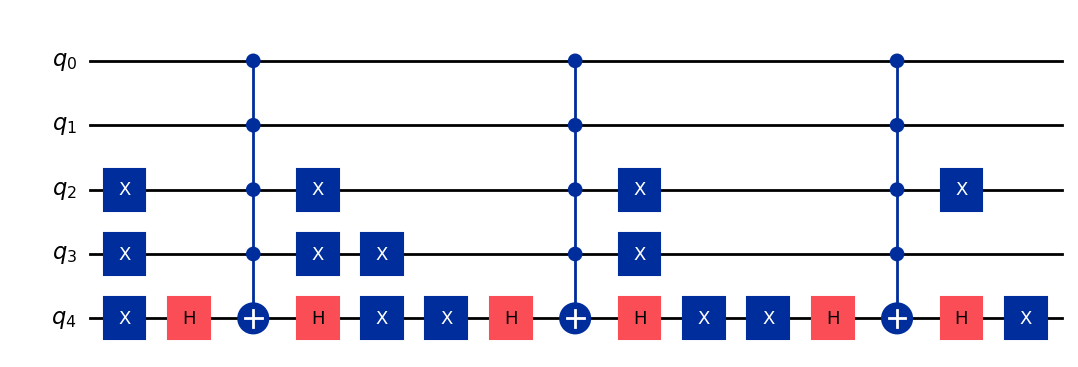

In [ ]:
def build_single_target_oracle(qc, target_bitstring_msb_first, num_qubits):
    """
    Applies a phase flip to the computational basis state represented by target_bitstring_msb_first.
    target_bitstring_msb_first: A string like '00011' (MSB first, e.g., '0' for q4, '1' for q0).
    qc: The QuantumCircuit to add gates to.
    num_qubits: The total number of qubits in the circuit.
    """
    assert len(target_bitstring_msb_first) == num_qubits, "Target bitstring length must match number of qubits."

    # Apply X gates to flip '0's to '1's for the target state
    # Qiskit indexes qubits from 0 (LSB) to num_qubits-1 (MSB).
    # target_bitstring_msb_first is MSB first, so target_bitstring_msb_first[0] is for qubit num_qubits-1.
    for i in range(num_qubits):
        # The bit for qubit i is at index (num_qubits - 1 - i) in the MSB-first string.
        if target_bitstring_msb_first[num_qubits - 1 - i] == '0':
            qc.x(i)

    # Apply multi-controlled Z gate (MCZ)
    # This gate applies a phase flip when all qubits are |1>.
    if num_qubits == 1:
        qc.z(0)
    elif num_qubits == 2:
        qc.cz(0, 1)
    else:
        # For n > 2, use the H-MCX-H decomposition.
        # Controls are all but the last qubit, target is the last qubit.
        controls_for_mcx = list(range(num_qubits - 1))
        target_for_mcx = num_qubits - 1

        qc.h(target_for_mcx)
        qc.mcx(controls_for_mcx, target_for_mcx)
        qc.h(target_for_mcx)

    # Revert X gates
    for i in range(num_qubits):
        if target_bitstring_msb_first[num_qubits - 1 - i] == '0':
            qc.x(i)


num_qubits = 5
g_oracle = QuantumCircuit(num_qubits)

# Define target states as decimal values
target_states_decimal = [3, 7, 11]

# Convert target states to 5-bit binary strings (MSB first)
target_states_binary = [bin(x)[2:].zfill(num_qubits) for x in target_states_decimal]

# Build the oracle by sequentially adding single-target phase flips for each target state
for target_bs in target_states_binary:
    build_single_target_oracle(g_oracle, target_bs, num_qubits)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

## 3.4.2 Operador de Difusão

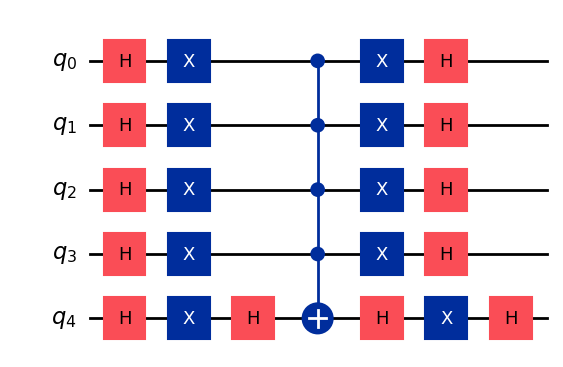

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

## 3.4.3 Aplicando $U_wU_s$, $r = 2 \times$

Agora, ajustamos a fórmula para o cálculo do número ideal de iterações para incluir o fator $k$, com o número de valores alvos desejados:

$$ r \approx \frac{\pi}{4} \sqrt{\frac{2^n}{k}}$$

In [ ]:
k = 3
r = int(np.floor(np.pi/4*np.sqrt(2**num_qubits/k)))
r

2

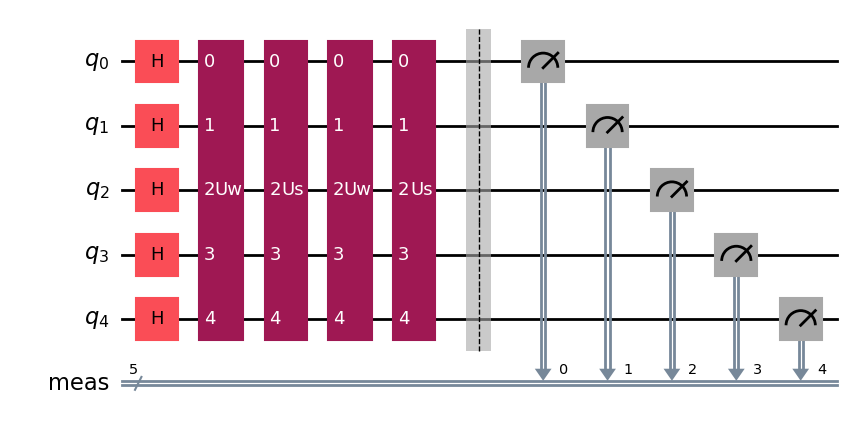

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(r):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
result.get_counts()



{'00011': 333, '00111': 350, '01011': 341}

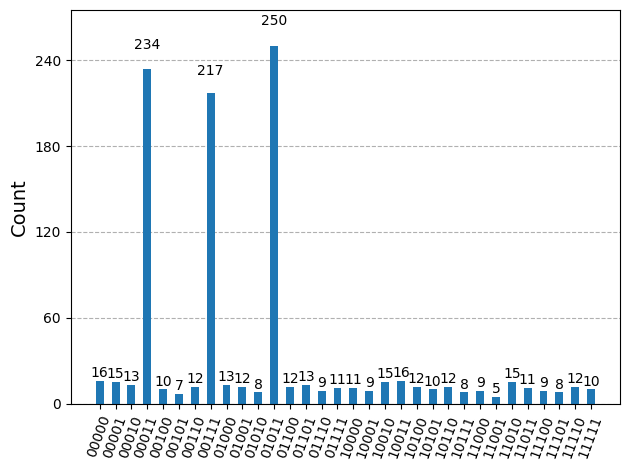

In [ ]:
plot_histogram(result.get_counts())

## 3.4.4 Resultado

O algoritmo encontra as soluções alvo $3 =|00011\rangle$, $7 =|00111\rangle$ e $11 =|01011\rangle$ com as maiores probabilidades. As distribuições das probabilidades das soluções após 1024 simulações encontram-se acima. Este cenário, executado aqui em um simulador quântico, é  validado em um hardware quântico real na próxima seção.










# 3.5 Operador Grover do Qiskit + qiskit_ibm_runtime <a id='cenario4plus'></a>

Esta implementação segue de perto [3] IBM QUANTUM. *Grover's algorithm*. Disponível em: https://quantum.cloud.ibm.com/docs/pt/tutorials/grovers-algorithm para empregar um computador quântico real empregando o **qiskit_ibm_runtime**. Nessa solução  empregamos um operador especial, o `qiskit.circuit.library import grover_operator`.

**Atenção:** Uma **API Key** de acesso é necessária e você deve substituir a string fornecida aqui por sua API Key individual.


In [ ]:
try:
  from qiskit_ibm_runtime import QiskitRuntimeService
  from qiskit_ibm_runtime import SamplerV2 as Sampler
except ImportError:
  print('Install qiskit_ibm_runtime')
  !pip install -q qiskit_ibm_runtime
  from qiskit_ibm_runtime import QiskitRuntimeService
  from qiskit_ibm_runtime import SamplerV2 as Sampler

## 3.5.1 Oracle Grover

In [ ]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler


def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [
            ind
            for ind in range(num_qubits)
            if rev_target.startswith("0", ind)
        ]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        if zero_inds:
            qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
            qc.x(zero_inds)
    return qc

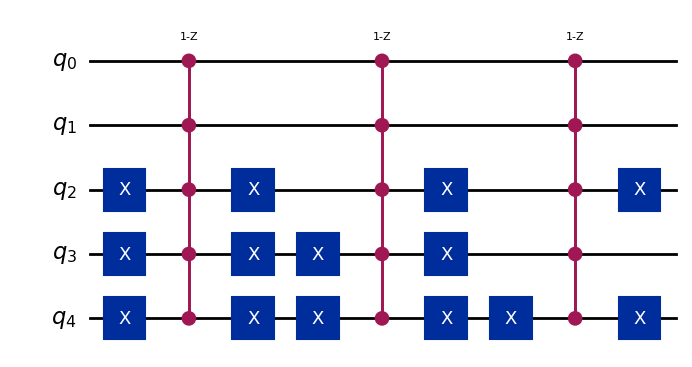

In [ ]:
marked_states = ["00011", "00111", "01011"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

## 3.5.2 Operador Grover

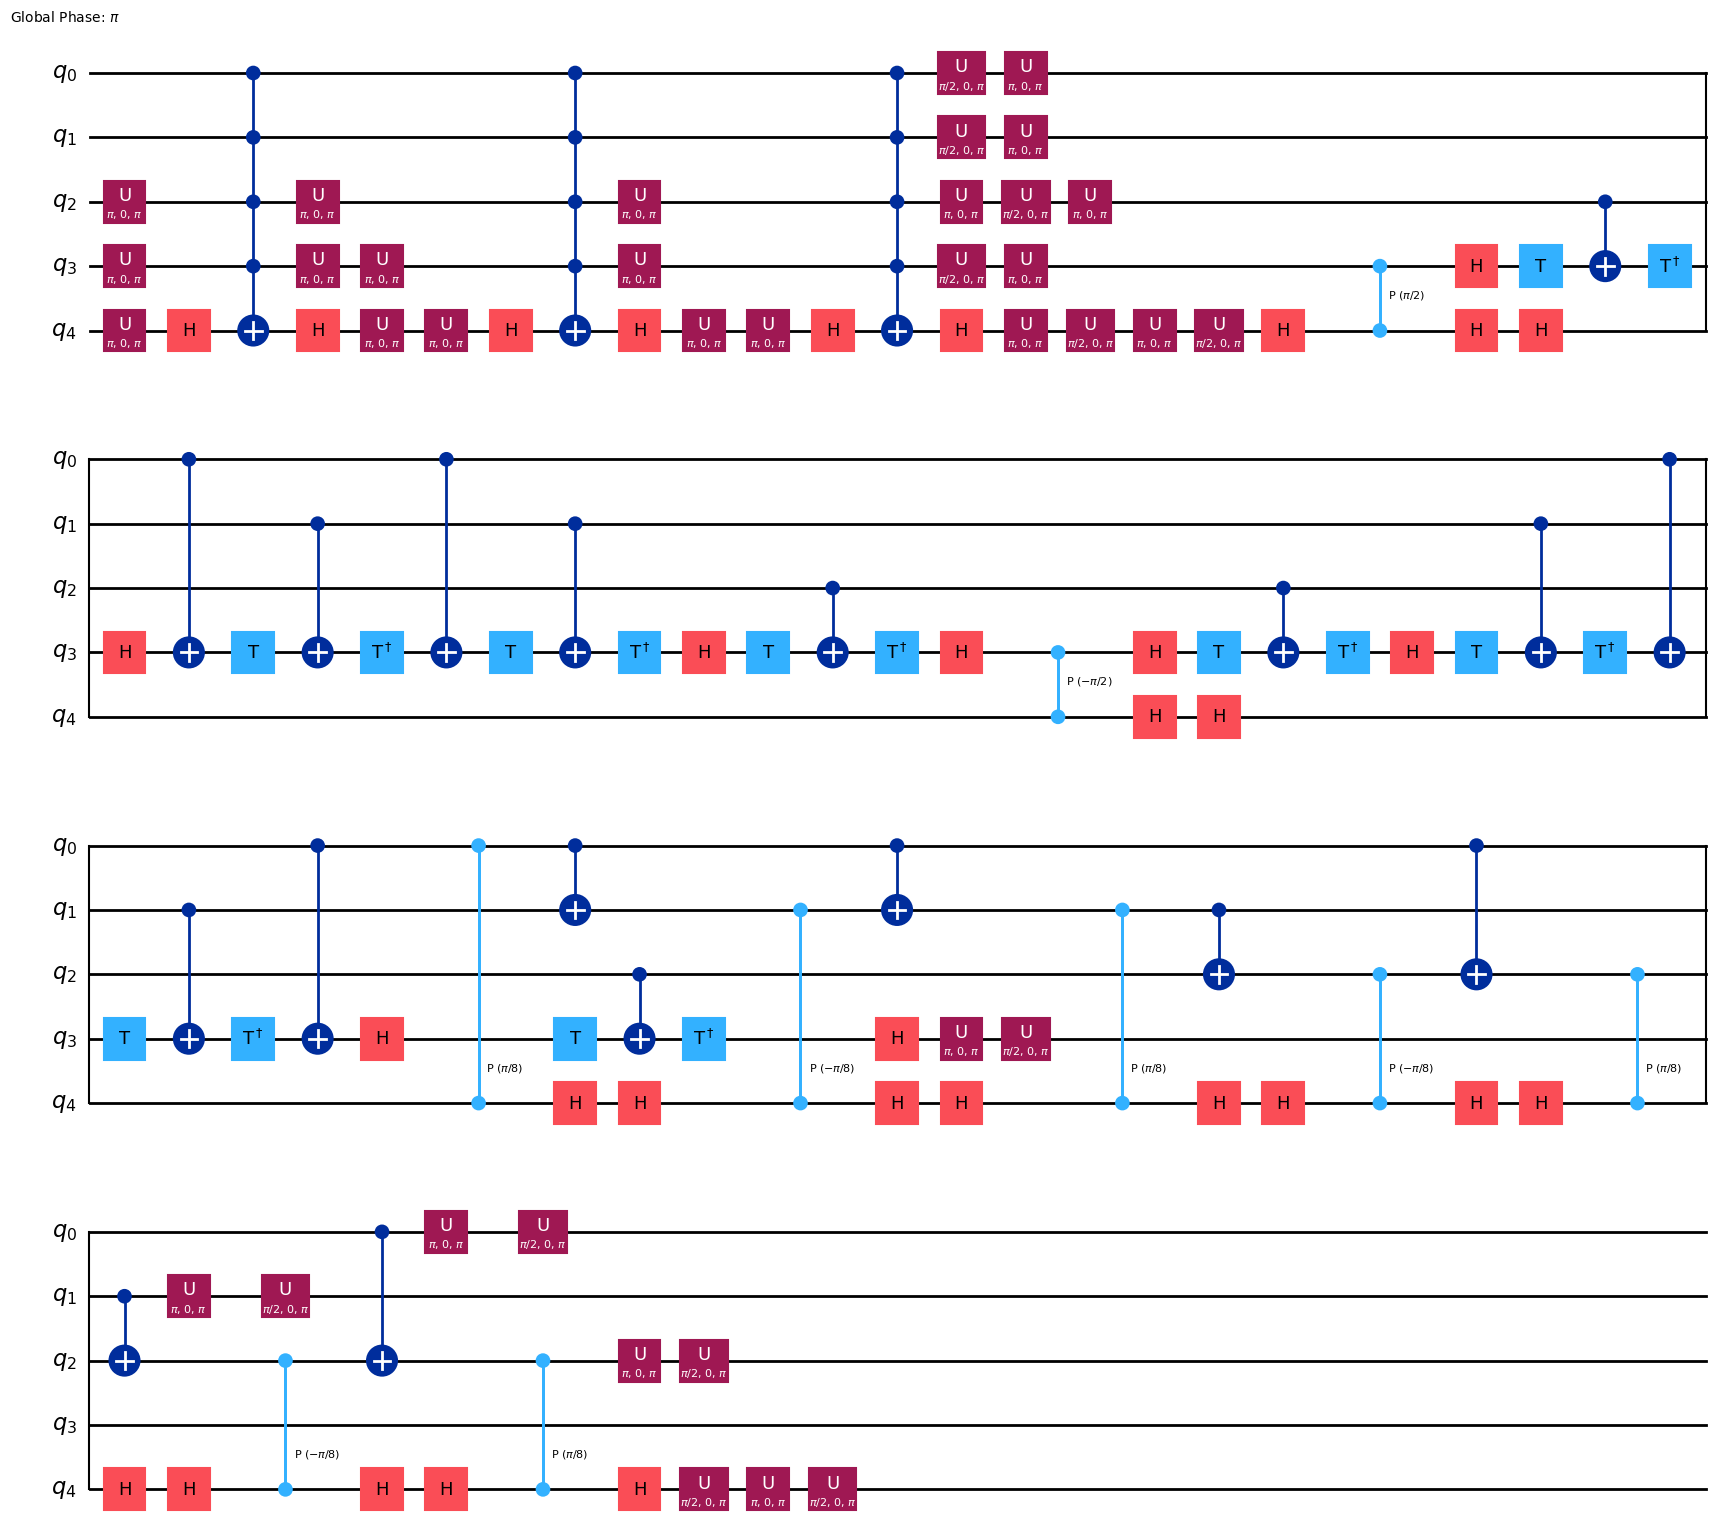

In [ ]:
grover_op = grover_operator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

### 3.5.2.1 Número ótimo de iterações

In [ ]:
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

In [ ]:
optimal_num_iterations

2

### 3.5.2.2 Circuito Grover Completo

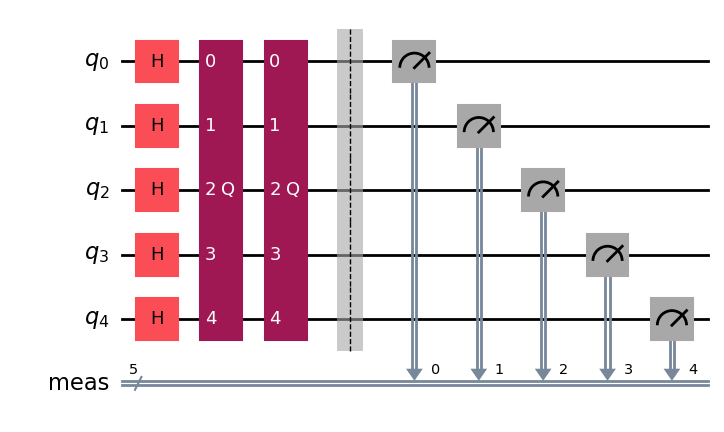

In [ ]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

## 3.5.3 Executando o Circuito no backend

### 3.5.3.1. Setando o backend

... Empregue a seguir sua API Key.
<!-- "4B1NyBMg*b8yEfKqciggvsr_VzKzc1Sn0u10rl_d-Wy*", substituir * pela inicial o filho mais velho -->

In [ ]:
service = QiskitRuntimeService(
    token = "INFORME AQUI A SUA API Key",
    channel = "ibm_cloud",
    instance = "crn:v1:bluemix:public:quantum-computing:us-east:a/c1072b2b029148c3a2328db9ebc5a84a:fa919622-e2df-4529-a115-78515bfd6329::"
)
# backend = service.get_backend("ibmq_qasm_simulator")

qiskit_runtime_service._discover_account:WARNING:2026-01-05 01:50:53,805: Loading account with the given token. A saved account will not be used.


In [ ]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
# service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)
backend.name

'ibm_torino'

In [ ]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

### 3.5.3.2. Executando

In [ ]:
# To run on local simulator:
#   1. Use the StatevectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

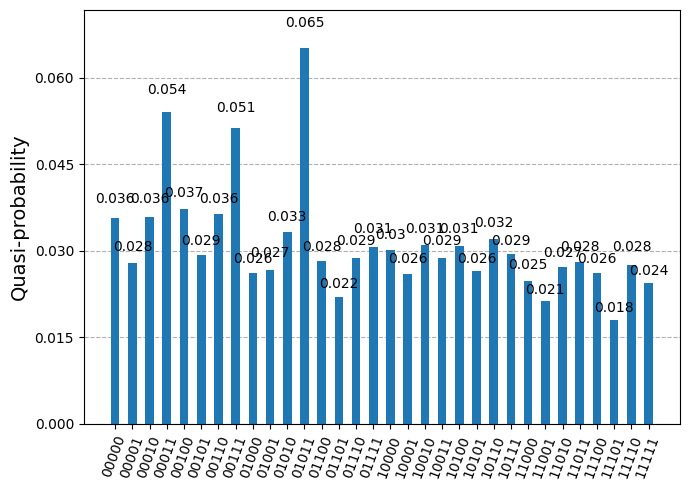

In [ ]:
plot_distribution(dist)

## 3.5.3.4 Resultado

Do mesmo modo que no simulador algoritmo no hardware quântico encontra as soluções alvo $3 =|00011\rangle$, $7 =|00111\rangle$ e $11 =|01011\rangle$com as maiores probabilidades. As distribuições das probabilidades das soluções após **10.000  simulações** no hardware quântico encontram-se acima.  

**As diferenças de probabilidade entre as soluções e não soluções não são entretanto tão evidentes quanto no simulador devido ao ruído do hardware quântico.**








# 4. Discussão dos resultados e Conclusões

Resumindo os resultados apresentados em cada seção, concluímos que:

1. Em **todos os cenários** o algoritmo encontrou efetivamente as soluções alvo.

2. No **Cenário 2** verificamos também que para valores abaixo ou acima do número ideal de iterações, no qual a probabilidade de medir o estado solução é maximizada, fazem essa probabilidade oscilar e diminuir. Também observamos o que ganho do algoritmo de Grover é quadrático, pois reduz o número de consultas ao oráculo de ordem  $O(N)$  para ordem  $O(\sqrt{N})$ .  

3. No **Cenário 3**, a execução total do algoritmo quântico levou cerca $\approx$ 41 min, para um problema de busca de solução de 20 bits. O consumo de recursos  e tempo demonstram mostram que, não obstante o potencial dos algoritmo quânticos para a solução de problemas complexos em tempo menor que as soluções clássicas, **sua aplicação prática como a quebra de criptograficas simétricas (128 bits) ainda depende de avanços significativos em hardware quântico.**

4. O **Cenário 4** demonstrou efetivamente a possibilidade de busca de múltiplos alvos. A solução foi executada com sucesso tanto no simulador quântico quanto em um hardware real, com os mesmos resultados. Mas vale notar que para execução **no hardware quântico a *transpilação* cria um circuito ligeiramente diferente para adequar ao hardware quântico**. Também podemos notar que **as diferenças de probabilidade entre as soluções e não soluções não são entretanto tão evidentes quanto no simulador devido ao ruído do hardware quântico.**

# Bibliografia

[1] L. K. Grover, A fast quantum mechanical algorithm for database search. Proceedings 28th Annual Symposium on the Theory of Computing (STOC) 1996, pp. 212-219. https://arxiv.org/abs/quant-ph/9605043

[2] de Oliveira, M.C., Fanchini, F.F., Arruda, L.G.E. *Introdução à Computação Quântica: Teoria e Prática com Python e Qiskit.* Editora Quati. Edição dos autores (2025).

[3] IBM QUANTUM. *Grover's algorithm*. Disponível em: https://quantum.cloud.ibm.com/docs/pt/tutorials/grovers-algorithm. Acesso em: 19 dez. 2025.

[4] IBM QUANTUM. *Grover's algorithm*. Disponível em: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb. Acesso em: 04 jan. 2026.

[5] Nielsen, M. A.; Chuang, I. L. Quantum computation and quantum information. 2. ed. Cambridge: Cambridge University Press, 2010.
